In [28]:
# from google.colab import drive
 
# drive.mount('/content/drive')

In [29]:
import numpy as np
import tensorflow as tf
import pandas as pd
from pathlib import Path
import os
from tensorflow.keras import models,layers

In [30]:
# Importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.utils import shuffle
# Our dictionary will contain only of the top 7000 words appearing most frequently
top_words = 7000

In [31]:
# DATASET PATHS
DATASET_DIR = Path('NEW_DATASET_10')

In [32]:
# Setting Up Directories

# TRAIN DATA PATH
TRAIN_CSV_PATH = os.path.join(DATASET_DIR,'TRAIN','multimodal_train.csv')
TRAIN_IMG_PATH = os.path.join(DATASET_DIR,'TRAIN','IMAGES')

# TEST DATA PATH
TEST_CSV_PATH = os.path.join(DATASET_DIR,'TEST','multimodal_test.csv')
TEST_IMG_PATH = os.path.join(DATASET_DIR,'TEST','IMAGES')

# VALIDATE DATA PATH
VALIDATE_CSV_PATH = os.path.join(DATASET_DIR,'VALIDATE','multimodal_validate.csv')
VALIDATE_IMG_PATH = os.path.join(DATASET_DIR,'VALIDATE','IMAGES')


# Model Outputs
MODEL_OUTPUT_DIR = Path('Model_Outputs')

In [33]:
train_df = pd.read_csv(TRAIN_CSV_PATH)
train_df.head()

,Unnamed: 0,Unnamed: 0.1,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,436310,436310,jessicaO_o,this perfectlysized woody doll stuck to the ba...,1.569282e+09,i.redd.it,True,d8evxg,https://preview.redd.it/mss81mprifo31.jpg?widt...,NaN,4.0,37,mildlyinteresting,This perfectly-sized Woody doll stuck to the b...,0.78,1,0,0
1,112761,112761,NaN,large man jumping into a pool,1.406789e+09,dumpaday.com,True,2c7vxd,https://external-preview.redd.it/g7DkrdPEupDdZ...,NaN,24.0,64,photoshopbattles,Large man jumping into a pool,0.72,1,0,0
2,335972,335972,Duckitor,cops man sets up fake dui checkpoint gets char...,1.460131e+09,wtae.com,True,4dwzqp,https://external-preview.redd.it/twPZ8mH_gGc--...,NaN,0.0,36,nottheonion,"Cops: Man sets up fake DUI checkpoint, gets ch...",0.81,1,0,0
3,185095,185095,SuperKozz,turtle enjoying the sun,1.512896e+09,i.redd.it,True,7iszja,https://preview.redd.it/2na6m5s382301.jpg?widt...,NaN,5.0,11,photoshopbattles,PsBattle: Turtle enjoying the sun,0.84,1,0,0
4,189772,189772,nicksatdown,grandfather who beat three types of cancer com...,1.421564e+09,telegraph.co.uk,True,2st8j2,https://external-preview.redd.it/FBf2kiPgNr8K5...,NaN,1.0,23,upliftingnews,Grandfather who beat three types of cancer com...,0.85,1,0,0


In [34]:
train_df = shuffle(train_df)
train_df.head()

,Unnamed: 0,Unnamed: 0.1,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
46217,503806,503806,_Awkadaf_,this was my favourite crossover,1.495017e+09,NaN,True,dho3mqf,http://i.imgur.com/Fot5v0t.jpg,6bna4r,NaN,536,psbattle_artwork,This was my favourite crossover,NaN,0,2,4
25027,194542,194542,sincewedidthedo,escaped pig named bacon ends up as bacon,1.478573e+09,clickorlando.com,True,5bqoim,https://external-preview.redd.it/Qu-Mz9F4PG-87...,NaN,1.0,51,nottheonion,"Escaped pig, named Bacon, ends up as bacon",0.90,1,0,0
48841,400368,400368,osrule86,i think theyre out of cats,1.362180e+09,NaN,True,c8o4k37,http://i.imgur.com/AjAOqS1.jpg,19grwu,NaN,40,psbattle_artwork,I think they're out of cats.,NaN,0,2,4
11497,380057,380057,DeUs_1893,odometer and trip meter hit all s at the same ...,1.564340e+09,i.redd.it,True,cizs6e,https://preview.redd.it/c4j9y3u9d3d31.jpg?widt...,NaN,5.0,11,mildlyinteresting,Odometer and Trip Meter hit all 6's at the sam...,0.71,1,0,0
5793,145545,145545,Fencrier,the concave skirting board in my room has a co...,1.550964e+09,i.redd.it,True,au1h7w,https://preview.redd.it/wq2egz5siei21.jpg?widt...,NaN,3.0,12,mildlyinteresting,The concave skirting board in my room has a co...,0.80,1,0,0


In [35]:
X_train = train_df.iloc[:,3].values    
X_train

array(['this was my favourite crossover',
       'escaped pig named bacon ends up as bacon',
       'i think theyre out of cats', ...,
       'after learning about anime american diplomats contemplate on what good a rd nuke have done to japan',
       'us and china near a trade deal to drop tariffs',
       'this cavalier girl at the pacers game last night'], dtype=object)

In [36]:
y_train = train_df.iloc[:,15].values
y_train

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [37]:
print('Shape of training data: ')
print(X_train.shape)
print(y_train.shape)

Shape of training data: 
(56400,)
(56400,)


In [38]:
test_df = pd.read_csv(TEST_CSV_PATH)
test_df = shuffle(test_df)

In [39]:
X_test = test_df.iloc[:,3].values
X_test

array(['ww allied forces special forces member meets up with leader of grassroots anti fascist resistance group to stop nazi terrorist threats in the usa spring',
       'an upcoming ds puzzle game', 'looks be deceiving', ...,
       'graduation photo shoot gets magical',
       'picture of obama from link on google homepage',
       'degodeg how did you find me'], dtype=object)

In [40]:
y_test = test_df.iloc[:,15].values
y_test

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [41]:
print('Shape of test data: ')
print(X_test.shape)
print(y_test.shape)

Shape of test data: 
(5930,)
(5930,)


In [42]:
val_df = pd.read_csv(VALIDATE_CSV_PATH)
val_df = shuffle(val_df)

In [43]:
X_val = val_df.iloc[:,3].values
X_val

array(['van geth reinvent', 'cutouts', 'we were doing vr in class', ...,
       'the way the sun hits this cloud',
       'kid with vegetahair formed from high wind speed', 'yawning bunny'],
      dtype=object)

In [44]:
y_val = val_df.iloc[:,15].values
y_val

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [46]:
tk = Tokenizer(num_words=1000,
filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n',lower=True, split=" ")
tk.fit_on_texts(X_train)
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=100)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=100)



In [47]:
len(tk.index_word)

36437

-------------

### Simple CNN

-------------------

In [48]:
from keras import layers
from keras.optimizers import Adam

In [49]:
# model = Sequential()

# model.add(layers.Embedding(input_dim=len(tk.index_word),output_dim=8, input_length=100) )
# model.add(layers.Dropout(0.5))

# # model.add(layers.Embedding(input_dim=len(tk.index_word),output_dim=8)) # to be filled
# model.add(layers.Conv1D(16,3))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Flatten())

# model.add(layers.Dense(128))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation(activation='relu'))

# model.add(layers.Dropout(0.8))

# model.add(layers.Dense(128))
# model.add(layers.Dense(1,activation='sigmoid'))

# adam = Adam(learning_rate=1e-4)
# model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# model.summary()

In [50]:
model = Sequential()
model.add(layers.Embedding(input_dim=len(tk.index_word),
                               output_dim=8,
                               input_length=100
                              ))
    
model.add(layers.Conv1D(16,kernel_size=3))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling1D(2))
    
model.add(layers.Conv1D(32,kernel_size=3))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling1D(2))
    
model.add(layers.Conv1D(64,kernel_size=3))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.Dropout(0.8))
model.add(layers.MaxPooling1D(2))
   
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1,activation="sigmoid"))

adam = Adam(learning_rate=1e-4)

model.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])

In [51]:
# emb_model = models.Sequential()
# emb_model.add(layers.Embedding(len(tk.index_word), 8, input_length=100))
# emb_model.add(layers.Convolution1D(16,4,activation='relu',kernel_regularizer='l2'))
# emb_model.add(layers.Dropout(0.5))
# emb_model.add(layers.MaxPooling1D())
# emb_model.add(layers.Convolution1D(32,4,activation='relu',kernel_regularizer='l2'))
# emb_model.add(layers.Dropout(0.8))
# emb_model.add(layers.MaxPooling1D())
# # emb_model.add(layers.Flatten())
# emb_model.add(layers.Dense(1, activation='sigmoid'))

In [52]:
# emb_model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy() ,metrics=[tf.keras.metrics.Accuracy()])
# emb_model.summary()

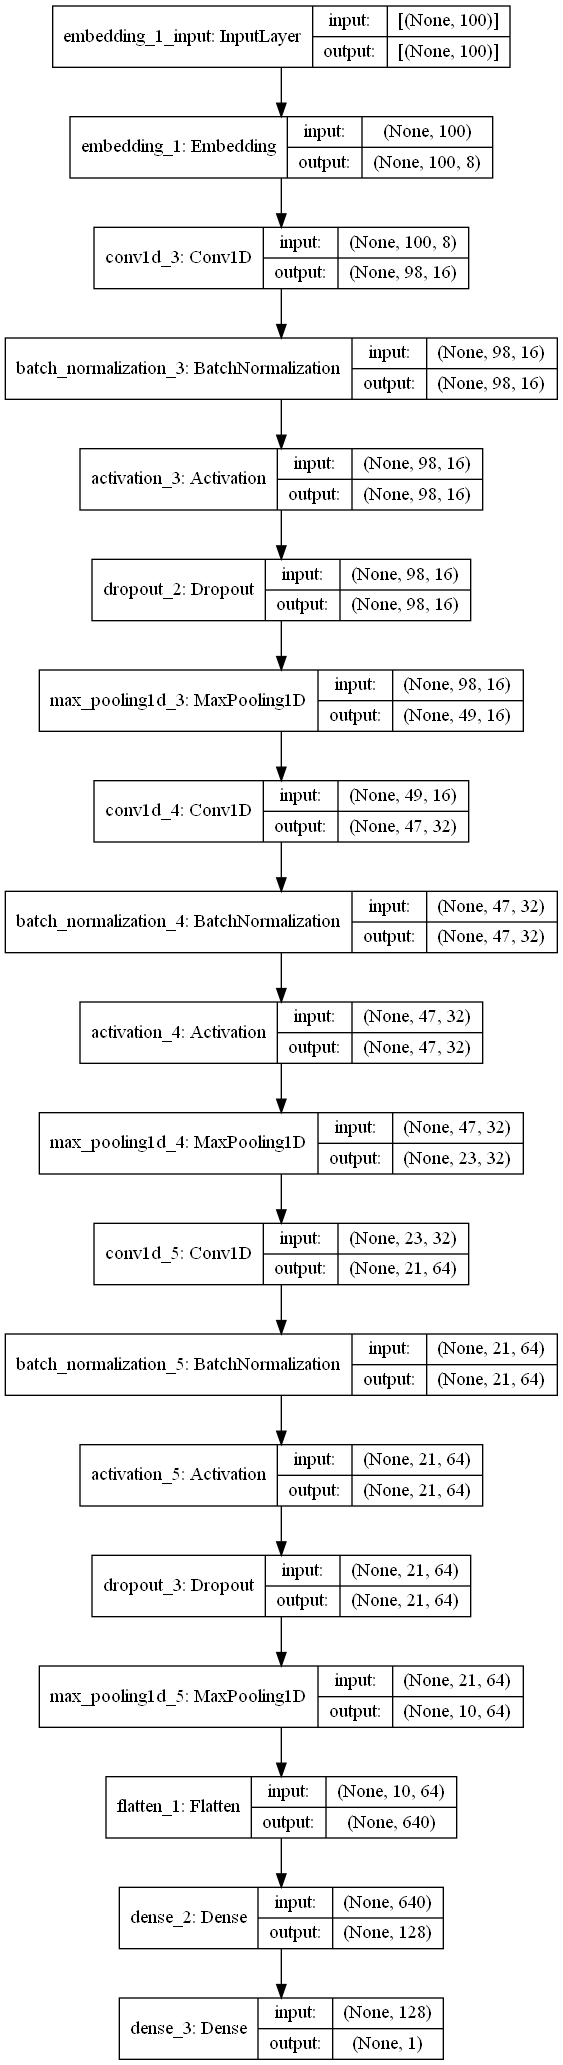

In [53]:
from keras.utils import plot_model
plot_model(model,'MODEL.png',show_shapes=True)

In [54]:
history = model.fit(x=X_train_seq_trunc,y=y_train,epochs=100,validation_split=0.2)

Epoch 1/100
1410/1410 [==============================] - 19s 13ms/step - loss: 0.7577 - accuracy: 0.5327 - val_loss: 0.6933 - val_accuracy: 0.5405
Epoch 2/100
1410/1410 [==============================] - 18s 13ms/step - loss: 0.7039 - accuracy: 0.5566 - val_loss: 0.6910 - val_accuracy: 0.5453
Epoch 3/100
1410/1410 [==============================] - 19s 13ms/step - loss: 0.6950 - accuracy: 0.5582 - val_loss: 0.6874 - val_accuracy: 0.5582
Epoch 4/100
1410/1410 [==============================] - 17s 12ms/step - loss: 0.6878 - accuracy: 0.5707 - val_loss: 0.6841 - val_accuracy: 0.5702
Epoch 5/100
1410/1410 [==============================] - 18s 13ms/step - loss: 0.6879 - accuracy: 0.5666 - val_loss: 0.6855 - val_accuracy: 0.5677
Epoch 6/100
1410/1410 [==============================] - 19s 13ms/step - loss: 0.6834 - accuracy: 0.5715 - val_loss: 0.6806 - val_accuracy: 0.5762
Epoch 7/100
1410/1410 [==============================] - 19s 13ms/step - loss: 0.6798 - accuracy: 0.5798 - val_loss: 0

In [55]:
import matplotlib.pyplot as plt 

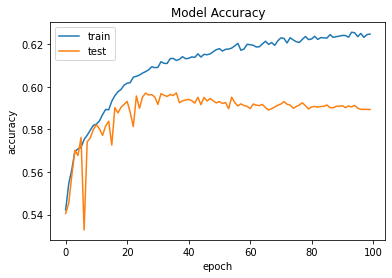

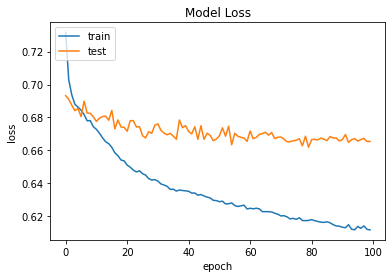

In [56]:
# Model Outputs

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()